In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
adresses = [
    'YouTube_CSV/1_Wildlife/',
    'YouTube_CSV/2_Dynasties/',
    'YouTube_CSV/3_Big_Bang/',
    'YouTube_CSV/4_UK_National_Parks/',
    'YouTube_CSV/5_Mate_or_die_trying/',
    'YouTube_CSV/6_Where_Are_the_Stars/',
    'YouTube_CSV/7_Filming_Wildlife_Documentary/',
    'YouTube_CSV/8_Fireflies/',
    'YouTube_CSV/9_Seven_Worlds/',
    'YouTube_CSV/10_Uncover_Antarctica/',
    'YouTube_CSV/11_What_Sperm_Whales/',
    'YouTube_CSV/12_Everest_Biology/',
    'YouTube_CSV/13_Mapping_the_Highest_Peak/',
    'YouTube_CSV/14_Meet_the_Worlds_Tiniest_Trees/',
    'YouTube_CSV/15_What_To_Do/',
    'YouTube_CSV/16_Everest_Weather/',
    'YouTube_CSV/17_What_Mud_From_Glacial_Lakes/',
    'YouTube_CSV/18_Everest_Glaciology/',
    'YouTube_CSV/19_Plants_Dying/',
    'YouTube_CSV/20_Macaroni_Penguins/',
    'YouTube_CSV/21_Go_Inside_an_Antarctic_City/',
    'YouTube_CSV/22_Snow_Leopards/',
    'YouTube_CSV/23_Saving_the_Florida_Wildlife_Corridor/',
    'YouTube_CSV/24_Wolf_Pack_Takes_on_a_Polar_Bear/',
    'YouTube_CSV/25_Last_Wild_Places/'
]

In [3]:
def density_counter(quality, is_plotted):
    time_unit = 1

    d = {'Video_number': [], 'Density_burst': [], 'Density_throttling': []}
    for i in range(len(adresses)):
        data = pd.read_csv(adresses[i] + quality + '.csv')
        max_time = data['Time'].iat[-1] - data['Time'].iat[0]
        time_units = math.ceil(max_time / time_unit)
        lengths = [0] * time_units
        for index, row in data.iterrows():
            lengths[math.floor(row['Time'] / time_unit)] += row['Length']

        # получили массив длин, надо вычислить расположение первоначального пика
        # и вычислить Density_burst и Density_throttling
        
        if is_plotted == True:
            
            times = [0] * (time_units + 1)

            for m in range(len(times)):
                times[m] = m * time_unit
            times = [0] * (time_units + 1)

            for m in range(len(times)):
                times[m] = m * time_unit

            plt.stairs(lengths, times, fill=True)
            plt.title(adresses[i] + '4K.csv')
            plt.xlabel('time')
            plt.show()

            
        difference_pos = 0
        
        # 40 -- 40 секунд, за которые точно успевает пройти burst
        burst_max_time = 40
        if time_units - 1 < 40:
            burst_max_time = time_units - 1
        
        # 1 способ -- если есть отрезок с нулевой передаваемой длиной
        for j in range(burst_max_time // time_unit):
            if (difference_pos == 0 and lengths[j + 1] == 0):
                difference_pos = j + 1

        # 2 способ -- если столбец отличается в 3 раза от следующего
        if difference_pos == 0:
            coeff = 3
            for j in range(burst_max_time // time_unit):
                if lengths[j] != 0 and lengths[j + 1] != 0 and lengths[j] > lengths[j + 1] * coeff:
                    difference_pos = j + 1
                    coeff = lengths[j] / lengths[j + 1]
        
        # 3 способ -- поиск зоны с наибольшей разницей плотности
        if difference_pos == 0:
            difference = 0
            for j in range(1, time_units):
                first_sum = 0
                second_sum = 0
                for k in range(0, j):
                    first_sum += lengths[k]
                for l in range(j, time_units):
                    second_sum += lengths[l]
                if first_sum / j - second_sum / (time_units - j) > difference:
                    difference = first_sum / j - second_sum / (time_units - j)
                    difference_pos = j
        
        if is_plotted == True:
            print('difference_pos: ' + str(difference_pos))

        
        # Вычислили расположение первоначального пика, остались density_burst и density_throttling

        density_burst = 0
        density_throttling = 0
        for p in range(0, difference_pos):
            density_burst += lengths[p]
        for q in range(difference_pos, time_units):
            density_throttling += lengths[q]
        density_burst = density_burst / (difference_pos * time_unit)
        density_throttling = density_throttling / ((time_units - difference_pos) * time_unit)

        num_spaces = len(str(int(density_burst))) - len(str(int(density_throttling)))
        
        if is_plotted == True:
            print('density_burst:        ', density_burst)
            print('density_throttling:   ' + ' ' * num_spaces, density_throttling)

        d['Video_number'].append(i + 1)
        d['Density_burst'].append(density_burst)
        d['Density_throttling'].append(density_throttling)
        
    return d

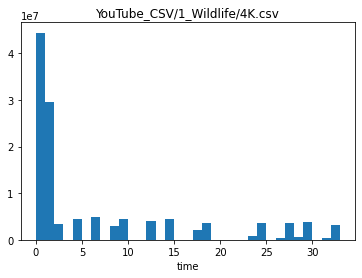

difference_pos: 3
density_burst:         25758728.333333332
density_throttling:     1585146.3


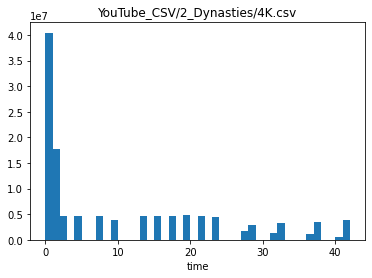

difference_pos: 3
density_burst:         20934975.666666668
density_throttling:     1511580.1794871795


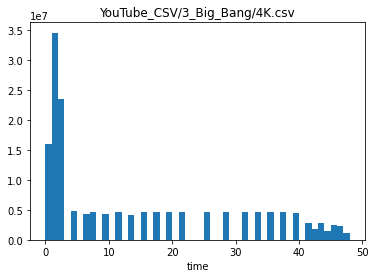

difference_pos: 3
density_burst:         24736381.333333332
density_throttling:     2061731.2666666666


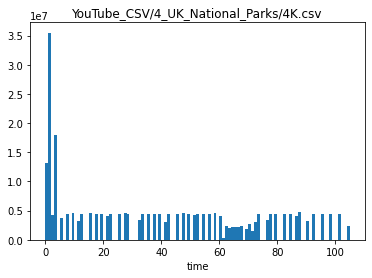

difference_pos: 4
density_burst:         17716277.0
density_throttling:     2028604.1683168316


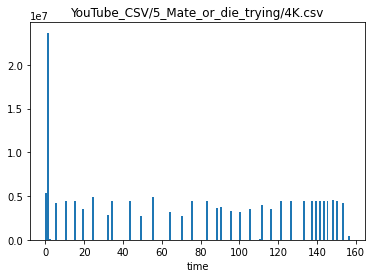

difference_pos: 3
density_burst:         9715530.666666666
density_throttling:     842624.2662337662


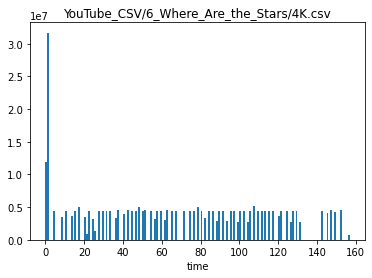

difference_pos: 2
density_burst:         21763364.5
density_throttling:     1827577.3612903226


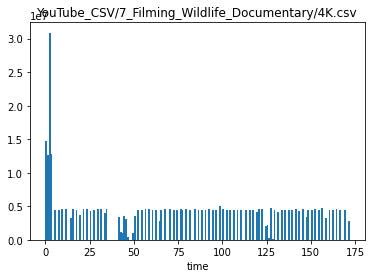

difference_pos: 4
density_burst:         17789854.75
density_throttling:     2094850.767857143


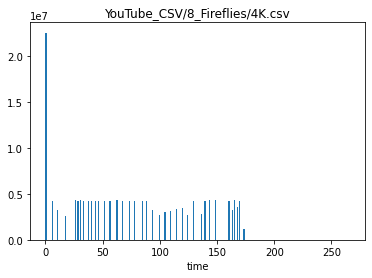

difference_pos: 1
density_burst:         22528835.0
density_throttling:      529345.7132075472


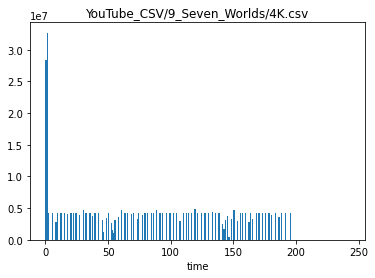

difference_pos: 3
density_burst:         21769150.666666668
density_throttling:     1317822.8375


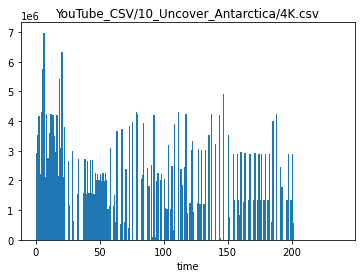

difference_pos: 23
density_burst:         3860775.3913043477
density_throttling:    1192906.4325581396


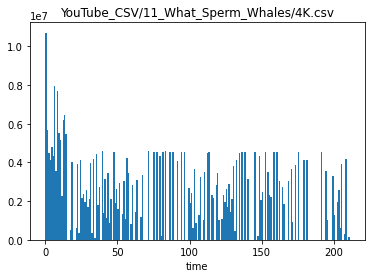

difference_pos: 15
density_burst:         5626412.933333334
density_throttling:    1669744.5408163266


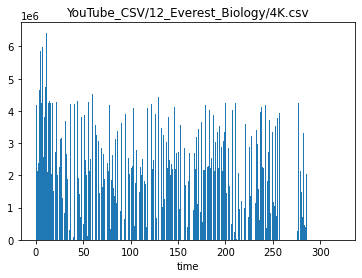

difference_pos: 29
density_burst:         3342867.5172413792
density_throttling:    1363895.4315068494


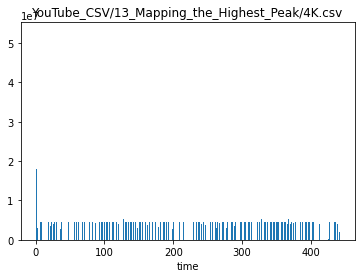

difference_pos: 3
density_burst:         24494151.333333332
density_throttling:     1690658.15


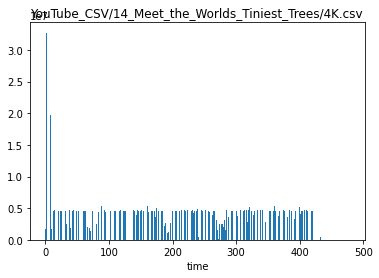

difference_pos: 3
density_burst:         12707263.666666666
density_throttling:     1840269.9096638656


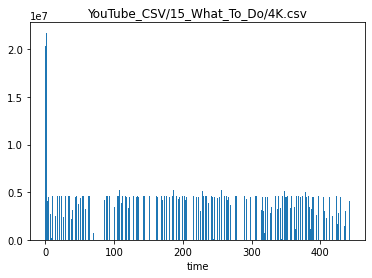

difference_pos: 5
density_burst:         14109410.8
density_throttling:     1854287.99543379


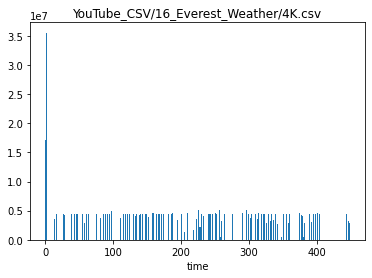

difference_pos: 3
density_burst:         20749174.333333332
density_throttling:     1361573.6076233184


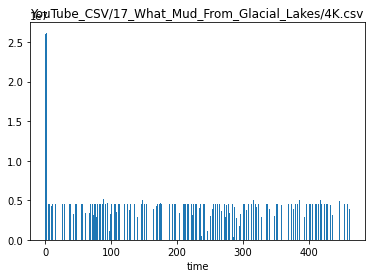

difference_pos: 3
density_burst:         18917505.666666668
density_throttling:     1831183.0893246187


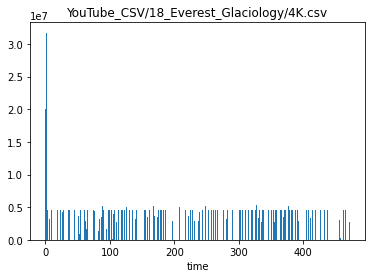

difference_pos: 4
density_burst:         14757157.5
density_throttling:     1567211.405982906


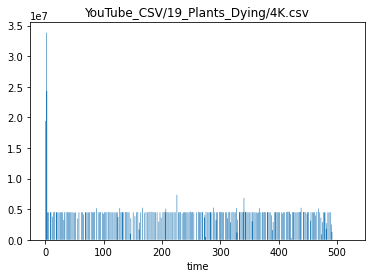

difference_pos: 4
density_burst:         20510020.25
density_throttling:     1966033.5135135136


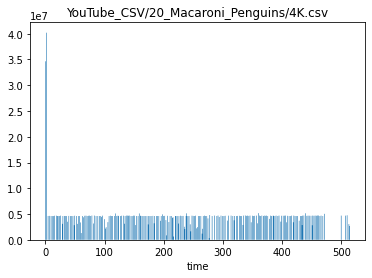

difference_pos: 2
density_burst:         37416633.0
density_throttling:     1959569.087890625


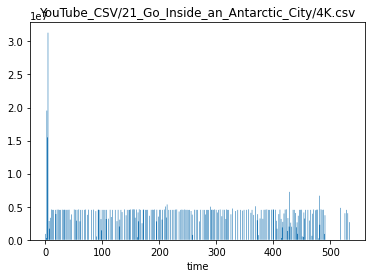

difference_pos: 5
density_burst:         13495259.2
density_throttling:     1670118.4971644613


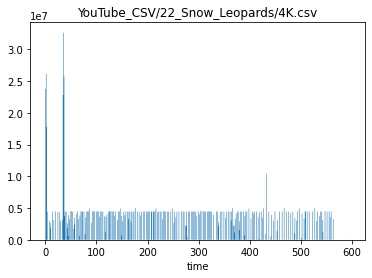

difference_pos: 3
density_burst:         22556985.333333332
density_throttling:     1637531.8229342327


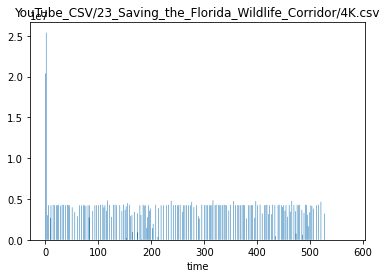

difference_pos: 2
density_burst:         22882952.5
density_throttling:     1135178.2966841187


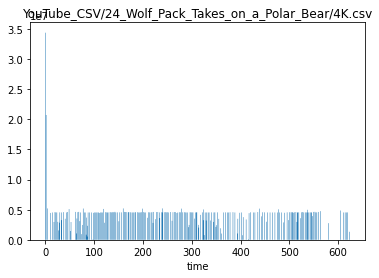

difference_pos: 2
density_burst:         27554606.0
density_throttling:     1517775.0530546624


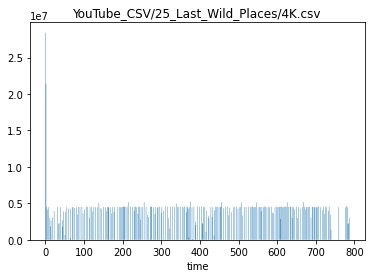

difference_pos: 2
density_burst:         24918728.0
density_throttling:     1248245.3206106871


In [4]:
d = density_counter('4K', True)

In [5]:
pd.DataFrame(data=d).head(5)

,Video_number,Density_burst,Density_throttling
0,1,2.575873e+07,1.585146e+06
1,2,2.093498e+07,1.511580e+06
2,3,2.473638e+07,2.061731e+06
3,4,1.771628e+07,2.028604e+06
4,5,9.715531e+06,8.426243e+05


In [6]:
df_4K = pd.DataFrame(data=density_counter('4K', False))
df_4K.head(5)

,Video_number,Density_burst,Density_throttling
0,1,2.575873e+07,1.585146e+06
1,2,2.093498e+07,1.511580e+06
2,3,2.473638e+07,2.061731e+06
3,4,1.771628e+07,2.028604e+06
4,5,9.715531e+06,8.426243e+05


In [7]:
df_1440 = pd.DataFrame(data=density_counter('1440', False))
df_1440.head(5)

,Video_number,Density_burst,Density_throttling
0,1,13658359.00,2.933333
1,2,46682571.00,39511.729167
2,3,22078572.00,165167.280702
3,4,18859388.00,457462.079646
4,5,5707550.75,145407.284848


In [8]:
df_1080 = pd.DataFrame(data=density_counter('1080', False))
df_1080.head(5)

,Video_number,Density_burst,Density_throttling
0,1,20224749.0,2.933333
1,2,18024984.0,2.933333
2,3,12865137.5,5.739130
3,4,13728106.0,7.352113
4,5,13080382.0,49020.863158


In [9]:
df_720 = pd.DataFrame(data=density_counter('720', False))
df_720.head(5)

,Video_number,Density_burst,Density_throttling
0,1,11899548.0,2.869565
1,2,10323730.0,2.933333
2,3,7353546.0,5.866667
3,4,8273887.0,6.600000
4,5,11338098.0,14331.203125


In [10]:
df_480 = pd.DataFrame(data=density_counter('480', False))
df_480.head(5)

,Video_number,Density_burst,Density_throttling
0,1,6411024.0,2.933333
1,2,5576503.0,2.933333
2,3,7444860.0,5.739130
3,4,4627552.5,3.300000
4,5,3275626.0,12723.873626


In [11]:
df_360 = pd.DataFrame(data=density_counter('360', False))
df_360.head(5)

,Video_number,Density_burst,Density_throttling
0,1,3945923.0,5.866667
1,2,3655865.0,2.933333
2,3,4714524.0,5.739130
3,4,3005547.0,852.251799
4,5,2381118.0,10934.840426


In [12]:
df_4K["Quality"] = "2160"
df_1440["Quality"] = "1440"
df_1080["Quality"] = "1080"
df_720["Quality"] = "720"
df_480["Quality"] = "480"
df_360["Quality"] = "360"

In [13]:
data = pd.concat([df_4K, df_1440, df_1080, df_720, df_480, df_360], ignore_index=True)
data

,Video_number,Density_burst,Density_throttling,Quality
0,1,2.575873e+07,1.585146e+06,2160
1,2,2.093498e+07,1.511580e+06,2160
2,3,2.473638e+07,2.061731e+06,2160
3,4,1.771628e+07,2.028604e+06,2160
4,5,9.715531e+06,8.426243e+05,2160
...,...,...,...,...
145,21,2.209689e+06,3.304367e+04,360
146,22,2.285067e+06,3.488049e+04,360
147,23,1.595180e+06,2.678645e+04,360
148,24,2.364400e+06,3.232247e+04,360


In [14]:
import os   
data.to_csv('data.csv')  